In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
def create_random_porous_media(height, width, number_of_particles, radius_range, dist=None):
    xx = np.random.uniform(width[0]+1, width[1]-1, (number_of_particles, number_of_particles))
    yy = np.random.uniform(height[0]+1, height[1]-1, (number_of_particles, number_of_particles))
    rr = np.random.uniform(radius_range[0], radius_range[1], (number_of_particles, number_of_particles))
    plt.figure(figsize=(20, 20*(height[1]/width[1])))
    fig = plt.gcf()
    for j in range(xx.shape[0]):
        for i in range(xx[j].shape[0]):
            circle1 = plt.Circle((xx[j][i], yy[j][i]), rr[i][j], color='r')
    #         circle1.set_facecolor(None)
            fig.gca().add_artist(circle1)
    plt.xlim(0, width[1])
    plt.ylim(0, height[1])
    plt.savefig('test.png')
    return xx, yy, rr

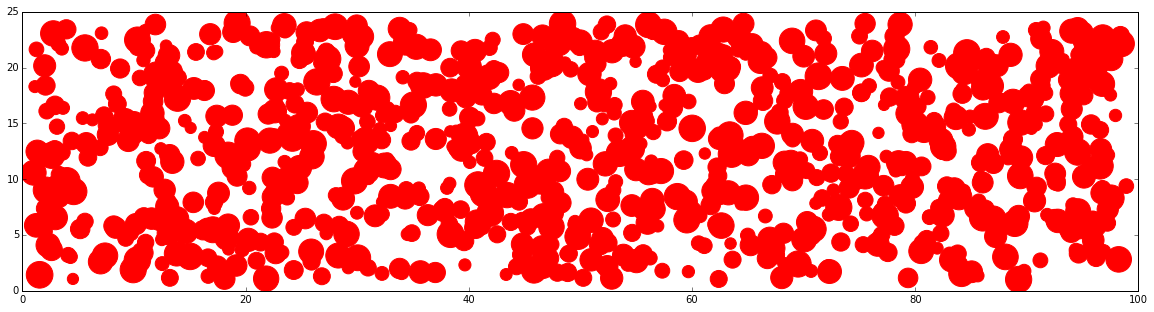

In [5]:
xx, yy, rr = create_random_porous_media(height=[0, 25], width=[0, 100], number_of_particles=30
                                        , radius_range=[0.5, 1.2])

In [28]:
import ezdxf

In [29]:
dwg = ezdxf.new('AC1015')
dwg.layers.create(name = 'frame')
dwg.layers.create(name = 'media')
msp = dwg.modelspace()

points = [(0, 0), (100, 0), (100, 25), (0, 25),(0,0)]
msp.add_lwpolyline(points,dxfattribs={'layer': 'frame'})


for j in range(xx.shape[0]):
    for i in range(xx[j].shape[0]):
        msp.add_circle((xx[j][i],yy[j][i]),rr[i][j],dxfattribs={'layer':'media'})

dwg.saveas("lwpolyline1.dxf")